In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer

In [14]:
yt1=pd.read_csv("ytcomments2.csv")
yt1.head(10)

,Unnamed: 0,Comment,Likes,Time,UserLink,user
0,0,"Not gonna lie I'm getting the strongest ""real ...",66K,3 weeks ago,https://www.youtube.com/channel/UCzqHFULLurtbH...,NaN
1,1,Just imagine this technology in another 10-15 ...,138,2 weeks ago,NaN,NaN
2,2,So weird that people are worried about the int...,756,4 days ago,NaN,NaN
3,3,This is the most comprehensive and up to date ...,2.7K,2 weeks ago,NaN,NaN
4,4,I've only seen a couple of your videos so far ...,180,2 weeks ago,NaN,NaN
5,5,Seeing you this excited gave me the vibes I ha...,5,5 days ago,NaN,NaN
6,6,Great explanation. It’ll be really fun to try ...,6.5K,3 weeks ago,https://www.youtube.com/channel/UCtfXgNnA-Qcxj...,NaN
7,7,"Imagine a drone app with this, this would be p...",84,2 weeks ago,NaN,NaN
8,8,I'm interested to see developers come up with ...,10,2 weeks ago,NaN,NaN
9,9,I'm excited to see what happens with it in the...,36,2 weeks ago,NaN,NaN


#### convert time and likes to int form

In [15]:
def conv_time(x):
    if "week" in x:
        return int(x[0])
    else:
        return 1
def conv_likes(x):
    if "K" in x:
        return int(float(x[:-1])*1000)
    else:
        return int(x)

yt1["likes"]=yt1["Likes"].apply(lambda x: conv_likes(x))
yt1["time"]=yt1["Time"].apply(lambda x:conv_time(x))
yt1=yt1[["Comment","likes","time"]]
yt1.head(10)

,Comment,likes,time
0,"Not gonna lie I'm getting the strongest ""real ...",66000,3
1,Just imagine this technology in another 10-15 ...,138,2
2,So weird that people are worried about the int...,756,1
3,This is the most comprehensive and up to date ...,2700,2
4,I've only seen a couple of your videos so far ...,180,2
5,Seeing you this excited gave me the vibes I ha...,5,1
6,Great explanation. It’ll be really fun to try ...,6500,3
7,"Imagine a drone app with this, this would be p...",84,2
8,I'm interested to see developers come up with ...,10,2
9,I'm excited to see what happens with it in the...,36,2


#### tokenizing

In [4]:
text = " ".join(i for i in yt1.Comment)
text=word_tokenize(text)


#### filtering adj

In [5]:
POS = nltk.pos_tag(text)
def find_adj(x):
    if x[1]==("JJ" or "JJR" or "JJS"):
        return x[0]
    else:
        return 0
pos=map(find_adj,POS)
pos=list(pos)
pos = list(filter(lambda x: x != 0, pos))
pos[:10]

['real',
 'surreal',
 '10-15',
 're',
 'able',
 'weird',
 'worried',
 'retinal',
 'scan',
 'comprehensive']

#### setting stopwords and mask for wordcloud

In [6]:
stopwords = set(STOPWORDS)
stopwords.update(["sure","nice","re"])


vp_mask = np.array(Image.open("Apple-WWCD23-Vision-Pro-glass-230605_big.jpg.large_2x.jpg"))
for i in range(vp_mask.shape[0]):
    for m in range(vp_mask.shape[1]):
        for n in range(vp_mask.shape[2]):
            if vp_mask[i][m][n]==250:
                vp_mask[i][m][n]=255

#### drawing wordcloud

(-0.5, 1959.5, 1101.5, -0.5)

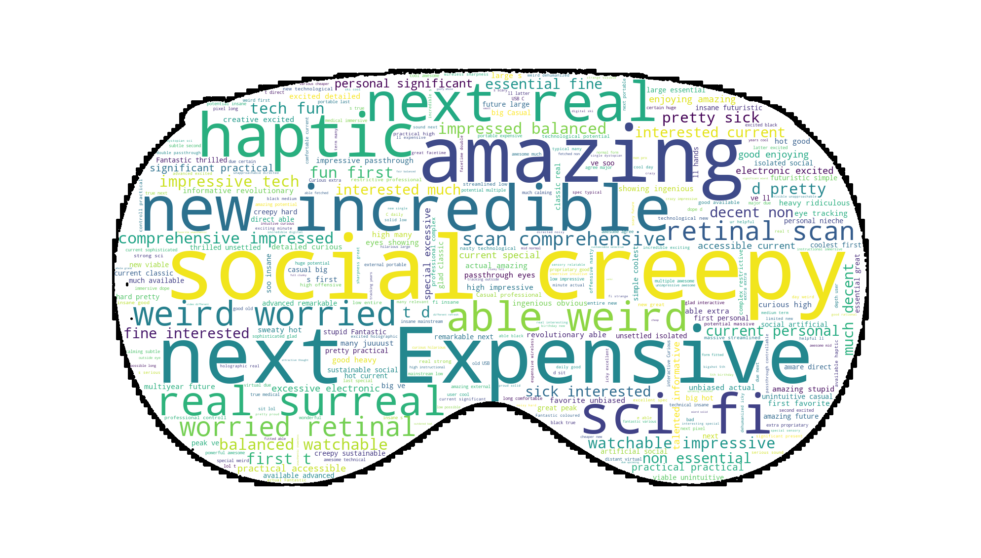

In [24]:
postext = " ".join(i for i in pos)
wc = WordCloud(background_color="white", max_words=1000, mask=vp_mask,
               stopwords=stopwords, contour_width=8, contour_color='black')

# Generate a wordcloud
wc.generate(postext)

# store to file
##wc.to_file("img/wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

#### use pretrained nltk (VADAR) sentimental model

In [17]:
sia = SentimentIntensityAnalyzer()
def get_sentiment(x):
    point=sia.polarity_scores(x)
    if point["compound"]>0:
        return "positive"
    elif point["compound"]<0:
        return "negative"
    else:
        return "netural"
    

yt1["sentiment"]=yt1["Comment"].apply(lambda x: get_sentiment(x)) 
mean_likes=yt1["likes"].mean()
yt1["tone"]=np.where(yt1['likes']<=mean_likes,"","strong")
yt1["w_sentiment"]=yt1["tone"]+" "+yt1["sentiment"]

#### sentiment

<AxesSubplot:ylabel='sentiment'>

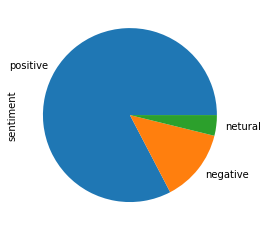

In [18]:
yt1["sentiment"].value_counts().plot.pie()

#### weighted sentiment by user likers

<AxesSubplot:ylabel='w_sentiment'>

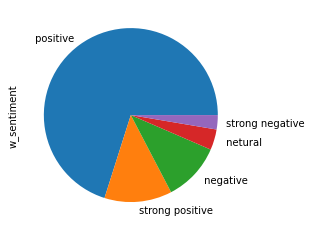

In [19]:
yt1["w_sentiment"].value_counts().plot.pie()

reference:

https://realpython.com/python-nltk-sentiment-analysis/#customizing-nltks-sentiment-analysis

https://towardsdatascience.com/basic-binary-sentiment-analysis-using-nltk-c94ba17ae386